In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
%matplotlib inline

In [3]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

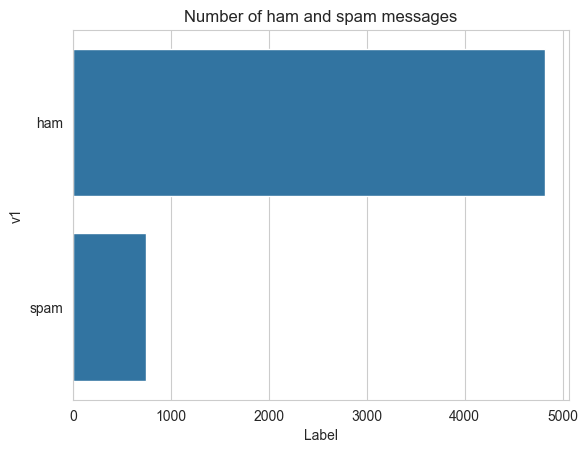

In [12]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [13]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [14]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [17]:
sequences[0]

[39,
 359,
 209,
 162,
 1,
 138,
 122,
 451,
 700,
 18,
 5,
 417,
 173,
 107,
 17,
 360,
 223,
 25,
 1,
 97,
 1,
 348,
 572,
 40,
 63]

In [18]:
for i in range(10):
    print(len(sequences[i]))

25
5
3
7
18
26
8
18
18
6


In [19]:
for i in range(10):
    print(len(sequences_matrix[i]))

150
150
150
150
150
150
150
150
150
150


In [20]:
sequences_matrix[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  39, 359, 209, 162,   1,
       138, 122, 451, 700,  18,   5, 417, 173, 107,  17, 360, 223,  25,
         1,  97,   1, 348, 572,  40,  63])

In [21]:
len(sequences_matrix[0])

150

In [22]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
def RNNmodel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [24]:
import tensorflow as tf

In [25]:
model = RNNmodel()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [26]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 3s 47ms/step - loss: 0.4377 - accuracy: 0.8438 - precision: 0.1262 - val_loss: 0.2765 - val_accuracy: 0.8531 - val_precision: 0.0000e+00
Epoch 2/10
28/28 [==============================] - 1s 34ms/step - loss: 0.1830 - accuracy: 0.9425 - precision: 0.9825 - val_loss: 0.1325 - val_accuracy: 0.9630 - val_precision: 0.9804
Epoch 3/10
28/28 [==============================] - 1s 34ms/step - loss: 0.0849 - accuracy: 0.9795 - precision: 0.9700 - val_loss: 0.0769 - val_accuracy: 0.9742 - val_precision: 0.9655
Epoch 4/10
28/28 [==============================] - 1s 34ms/step - loss: 0.0550 - accuracy: 0.9860 - precision: 0.9715 - val_loss: 0.0645 - val_accuracy: 0.9798 - val_precision: 0.9669
Epoch 5/10
28/28 [==============================] - 1s 34ms/step - loss: 0.0416 - accuracy: 0.9896 - precision: 0.9763 - val_loss: 0.0622 - val_accuracy: 0.9776 - val_precision: 0.9664
Epoch 6/10
28/28 [==============================] - 1s 34ms/step - loss

In [27]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [28]:
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 0s 6ms/step - loss: 0.0479 - accuracy: 0.9865 - precision: 0.9549


In [29]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.048
  Accuracy: 0.987


In [30]:
print(' LSTM Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

 LSTM Test set
  Loss: 0.048
  Accuracy: 0.987
